In [99]:
import pandas as pd
import numpy as np
import unicodedata
from nltk.tokenize import sent_tokenize #tokenizes sentences
from nltk.tokenize import word_tokenize #tokenizes words
from nltk.corpus import stopwords
import string
from nltk.util import ngrams
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk import pos_tag #tags the parts of speech.  VB=Verbs
from nltk import RegexpParser
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, KFold
import scipy.stats as scs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
punctuation_ = set(string.punctuation)
stopwords_ = set(stopwords.words('english'))
import matplotlib.pyplot as plt

In [11]:
acnh1=pd.read_csv('acnh_v_doom/NLP/acnh_txt.csv')
acnh1.columns

Index(['Unnamed: 0', 'subreddit', 'title', 'score', 'ups', 'id', 'url',
       'num_comments', 'created', 'body'],
      dtype='object')

In [12]:
doom1=pd.read_csv('acnh_v_doom/NLP/doom_txt.csv')
doom1.columns

Index(['Unnamed: 0', 'subreddit', 'title', 'score', 'ups', 'id', 'url',
       'num_comments', 'created', 'body'],
      dtype='object')

In [14]:
acnh = acnh1[~acnh1['body'].isnull()]
acnh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 988
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    229 non-null    int64  
 1   subreddit     229 non-null    object 
 2   title         229 non-null    object 
 3   score         229 non-null    int64  
 4   ups           229 non-null    int64  
 5   id            229 non-null    object 
 6   url           229 non-null    object 
 7   num_comments  229 non-null    int64  
 8   created       229 non-null    float64
 9   body          229 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 19.7+ KB


In [15]:
doom = doom1[~doom1['body'].isnull()]
doom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 986
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    354 non-null    int64  
 1   subreddit     354 non-null    object 
 2   title         354 non-null    object 
 3   score         354 non-null    int64  
 4   ups           354 non-null    int64  
 5   id            354 non-null    object 
 6   url           354 non-null    object 
 7   num_comments  354 non-null    int64  
 8   created       354 non-null    float64
 9   body          354 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 30.4+ KB


In [16]:
index_a=pd.Index(acnh['id'])
acnh_sub=pd.DataFrame(acnh['subreddit']).set_index(index_a)
index_d=pd.Index(doom['id'])
doom_sub=pd.DataFrame(doom['subreddit']).set_index(index_d)

In [17]:
Xa=pd.DataFrame(acnh['title']).set_index(index_a)
Xd=pd.DataFrame(doom['title']).set_index(index_d)
Xa_b=pd.DataFrame(acnh['body']).set_index(index_a)
Xd_b=pd.DataFrame(doom['body']).set_index(index_d)
X_body=pd.concat([Xa_b, Xd_b])
X_titles=pd.concat([Xd, Xa])
y=pd.concat([doom_sub ,acnh_sub])

In [85]:
y=pd.get_dummies(y)
y=y.iloc[:,0]

In [19]:
Ser_body=X_body['body']

In [26]:
test_str= X_body['body'][90]

In [25]:
import re

In [ ]:
punctuation_.remove('!','?')

In [43]:
stemmer_porter=PorterStemmer()
stemmer_porter.stem

In [45]:
url_rem=re.sub(r'http\S+', '', X_body['body'][10])
nl_rem=url_rem.replace('\n', '')
words=word_tokenize(nl_rem)
lower_words=[w.lower() for w in words]
filtered_words=[w for w in lower_words if w not in stopwords_ and w not in punctuation_]
tokens=[stemmer_porter.stem(words) for words in filtered_words]
tokens

['sinc',
 'winter',
 'come',
 'notic',
 'beach',
 'item',
 'hot',
 'summer',
 'theme',
 'base',
 '’',
 'struggl',
 'come',
 'idea',
 'decor',
 'beach',
 'winter',
 'guy',
 '?']

In [67]:
tokens=[]
for i in range(len(X_body)):
    url_rem=re.sub(r'http\S+', '', X_body['body'][i])
    nl_rem=url_rem.replace('\n', '')
    words=word_tokenize(nl_rem)
    lower_words=[w.lower() for w in words]
    filtered_words=[w for w in lower_words if w not in stopwords_ and w not in punctuation_]
    token=[stemmer_porter.stem(words) for words in filtered_words]
    s=' '
    s=s.join(token)
    tokens.append(s)

In [76]:
X_titles

,title
id,
k2xnxa,Plans for more Slayer characters?
k2x34c,failed to allocate video memory after i update...
k2x2br,Question for people that don't do combos
k2wtue,"Keeping cool is all I need for ""Treasure Hunter"""
k2wgb1,Is this an actual thing in Doom Eternal?
...,...
k20nv6,"Happy Birthday, Phil! 🎁"
k208xu,DIY Balloons
k20410,Should I take in Bam?


In [69]:
tokens[0]

'want draw fanart view poll'

In [70]:
arr=np.array(tokens)

In [160]:
X=pd.DataFrame(arr, index=X_body.index)

In [75]:
tfidf = TfidfVectorizer(smooth_idf=True)  # Checkout out the options!
document_tfidf_matrix = tfidf.fit_transform(X.iloc[:,0])
X_tf_idf = pd.DataFrame(document_tfidf_matrix.todense(), columns = tfidf.vocabulary_)
X_tf_idf.set_index(X.index)

,want,draw,fanart,view,poll,could,turkey,day,26th,time,...,friendly3,toaster,friendlyi,zandronum,particularli,superman,deadpool,toxin,symbiot,thrash
id,,,,,,,,,,,,,,,,,,,,,
k2xjwx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k2xjwx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k2xja1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k2x9wb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k2x987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
jyn1lj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jymyk5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.204218,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jylthc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_tf_idf, y, test_size=0.2)

In [87]:
def calculate_threshold_values(prob, y):
    '''
    Build dataframe of the various confusion-matrix ratios by threshold
    from a list of predicted probabilities and actual y values
    '''
    df = pd.DataFrame({'prob': prob, 'y': y})
    df.sort_values('prob', inplace=True)
    
    actual_p = df.y.sum()
    actual_n = df.shape[0] - df.y.sum()

    df['tn'] = (df.y == 0).cumsum()
    df['fn'] = df.y.cumsum()
    df['fp'] = actual_n - df.tn
    df['tp'] = actual_p - df.fn

    df['fpr'] = df.fp/(df.fp + df.tn)
    df['tpr'] = df.tp/(df.tp + df.fn)
    df['precision'] = df.tp/(df.tp + df.fp)
    df['F1'] = 2*((df.tp/(df.tp + df.fp)) * (df.tp/(df.tp + df.fn)))/((df.tp/(df.tp + df.fp)) + (df.tp/(df.tp + df.fn)))
    df = df.reset_index(drop=True)
    return df
    
def plot_roc(ax, df, val):
    ax.plot([1]+list(df.fpr), [1]+list(df.tpr), label="ROC "+f'{1/val} Regularization Constant')
    #ax.plot([0,1],[0,1], 'k', label="random")
    ax.set_xlabel('fpr', fontsize=14)
    ax.set_ylabel('tpr', fontsize=14)
    #ax.set_title('ROC Curve')
    ax.legend()
    
def plot_precision_recall(ax, df):
    ax.plot(df.tpr,df.precision, label='precision/recall')
    #ax.plot([0,1],[0,1], 'k')
    ax.set_xlabel('recall')
    ax.set_ylabel('precision')
    ax.set_title('Precision/Recall Curve')
    ax.plot([0,1],[df.precision[0],df.precision[0]], 'k', label='random')
    ax.set_xlim(xmin=0,xmax=1)
    ax.set_ylim(ymin=0,ymax=1)
    ax.legend()

In [84]:
model_L2 = LogisticRegression(C=0.1)#solver lbfgs, L2 cost function
model_L2.fit(X_train, y_train)

/Users/johnwilliams/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=0.1)

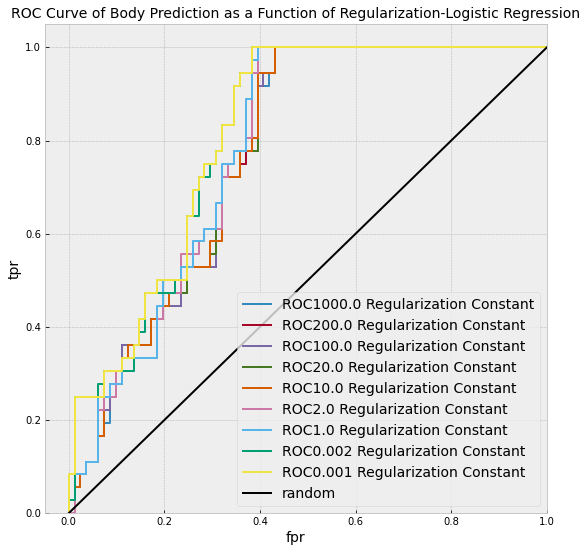

In [179]:
fig, (ax0) = plt.subplots(figsize=(9,9))
plt.style.use('bmh')
C_val=[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 500, 1000]
for val in C_val:
    model_C = LogisticRegression(C=val, max_iter=300)#solver lbfgs, L2 cost function
    model_C.fit(X_train, y_train)
    df = calculate_threshold_values(model_C.predict_proba(X_test)[:,0], y_test)
    plot_roc(ax0, df, val)
ax0.set_xlim(-0.05, 1)
ax0.set_ylim(0, 1.05)
ax0.plot([0,1],[0,1], 'k', label="random")
ax0.legend(fontsize=14)
ax0.set_title('ROC Curve of Body Prediction as a Function of Regularization-Logistic Regression', fontsize=14);
plt.savefig('acnh_v_doom/NLP/log_regres/Body_ROC_reg', bbox_inches='tight')

In [180]:
C_val=np.linspace(0.001, 5, 200)

In [96]:
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import StandardScaler

In [172]:
X_tf_idf.set_index(X.index, inplace=True)
X_train=X_tf_idf.loc[y_train.index]
X_train = X_train[~X_train.index.duplicated(keep='first')]
X_train.shape

(465, 3722)

In [97]:
def train_at_various_alphas(X, y, model, alphas, n_folds=10, **kwargs):
    y
    """Train a regularized regression model using cross validation at various
    values of alpha.
    
    Parameters
    ----------
    
    X: np.array
      Matrix of predictors.
      
    y: np.array
      Target array.
      
    model: sklearn model class
      A class in sklearn that can be used to create a regularized regression
      object.  Options are `Ridge` and `Lasso`.
      
    alphas: numpy array
      An array of regularization parameters.
      
    n_folds: int
      Number of cross validation folds.
      
    Returns
    -------
    
    cv_errors_train, cv_errors_test: tuple of DataFrame
      DataFrames containing the training and testing errors for each value of
      alpha and each cross validation fold.  Each row represents a CV fold, and
      each column a value of alpha.
    """
    cv_errors_train = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                     columns=alphas)
    cv_errors_test = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                        columns=alphas)
    for alpha in alphas:
        kf = KFold(n_splits=n_folds)
        
        for idx, (train, test) in enumerate(kf.split(X)):
    
            X_cv_train, y_cv_train = X.iloc[train], y.iloc[train]
            X_cv_test, y_cv_test = X.iloc[test], y.iloc[test]
      
            standardizer = StandardScaler()
            standardizer.fit(X_cv_train)
            X_cv_train_std= standardizer.transform(X_cv_train)
            X_cv_test_std= standardizer.transform(X_cv_test)
            
            m = model(C = alpha, max_iter=1000)
            m.fit(X_cv_train_std, y_cv_train)
        
            y_hat_train = m.predict(X_cv_train_std)
            y_hat_test = m.predict(X_cv_test_std)
        
            cv_errors_train[alpha][idx] = accuracy_score(y_cv_train, y_hat_train)
            cv_errors_test[alpha][idx] = accuracy_score(y_cv_test, y_hat_test)

    return cv_errors_train, cv_errors_test

In [173]:
cv_body_train, cv_body_test = train_at_various_alphas(
    X_train, y_train, LogisticRegression, C_val)  #these are dataframes cols are alpha, index are the folds, mean sq error as vals

In [174]:
avg_body_train = cv_body_train.mean()
avg_body_test = cv_body_test.mean()
max_acc=avg_body_test.max()
strength=1/C_val

In [175]:
def get_optimal_alpha(avg_errors_test):
    alphas = avg_errors_test.index
    optimal_idx = np.argmax(avg_errors_test.values)
    optimal_alpha = alphas[optimal_idx]
    return optimal_alpha, optimal_idx
optimal_body_alpha, optimal_body_idx = get_optimal_alpha(avg_body_test)

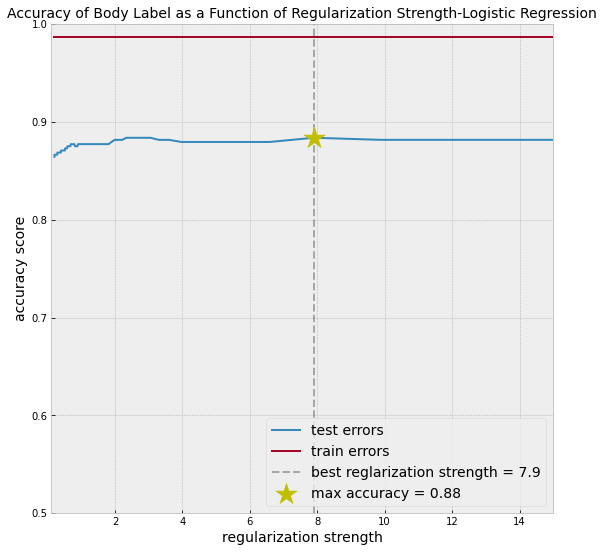

In [184]:
fig, ax=plt.subplots(figsize=(9,9))
plt.style.use('bmh')
ax.plot(strength, avg_body_test, label = 'test errors')
ax.plot(strength, avg_body_train, label = 'train errors')
ax.set_xlabel('regularization strength', fontsize=14)
ax.set_ylabel('accuracy score', fontsize=14)
ax.set_title('Accuracy of Body Label as a Function of Regularization Strength-Logistic Regression', fontsize=14)
ax.set_xlim(0.1, 15)
ax.set_ylim(0.5, 1)
ax.scatter(1/optimal_body_alpha, max_acc, label = f'max accuracy = {max_acc:.2f}', s= 500, color = 'y', marker = '*', zorder=4)
plt.axvline(1/optimal_body_alpha, label = f'best reglarization strength = {(1/optimal_body_alpha).round(1)}', color = 'k', linestyle = 'dashed', alpha=0.3)

plt.legend(loc = 4, fontsize=14);
#plt.savefig('acnh_v_doom/NLP/log_regres/Body_rec_reg', bbox_inches='tight')

In [107]:
document_tfidf_matrix = tfidf.fit_transform(X_titles.iloc[:,0])

Xtitle_tf_idf = pd.DataFrame(document_tfidf_matrix.todense(), columns = tfidf.vocabulary_)
Xtitle_tf_idf.set_index(X_titles.index, inplace=True)

In [108]:
y_test.index

Index(['k2su8s', 'k26b8z', 'jz99ob', 'k20i2l', 'jz0yat', 'k1vyr0', 'k1ngdg',
       'jzbj0a', 'k23duu', 'k2ettk',
       ...
       'k251mm', 'jztkjw', 'k07f0m', 'k2t113', 'k2ljay', 'k02ki7', 'k1scrq',
       'k2ekgt', 'k2aqia', 'k1dp6f'],
      dtype='object', name='id', length=117)

In [112]:
X_title_test=Xtitle_tf_idf.loc[y_test.index]
X_title_train=Xtitle_tf_idf.loc[y_train.index]

In [121]:
X_title_train = X_title_train[~X_title_train.index.duplicated(keep='first')]
y_train = y_train[~y_train.index.duplicated(keep='first')]

(465, 1309)

In [123]:
y_train = y_train[~y_train.index.duplicated(keep='first')]

This is the title accuracy

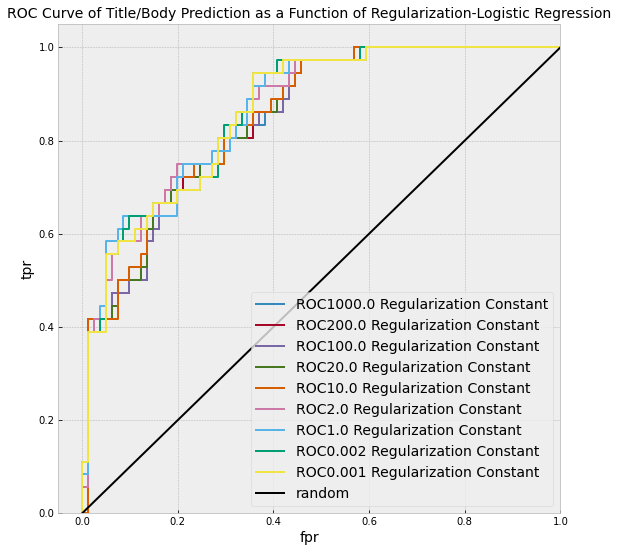

In [185]:
fig, (ax0) = plt.subplots(figsize=(9,9))
plt.style.use('bmh')
C_val=[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 500, 1000]
for val in C_val:
    model_C = LogisticRegression(C=val, max_iter=300)#solver lbfgs, L2 cost function
    model_C.fit(X_title_train, y_train)
    df = calculate_threshold_values(model_C.predict_proba(X_title_test)[:,1], y_test)
    plot_roc(ax0, df, val)
ax0.set_xlim(-0.05, 1)
ax0.set_ylim(0, 1.05)
ax0.plot([0,1],[0,1], 'k', label="random")
ax0.legend(fontsize=14)
ax0.set_title('ROC Curve of Title/Body Prediction as a Function of Regularization-Logistic Regression', fontsize=14);
plt.savefig('acnh_v_doom/NLP/log_regres/Body_Title_ROC_reg', bbox_inches='tight')

This is the title accuracy 

In [138]:
cv_errors_train, cv_errors_test = train_at_various_alphas(
    X_title_train, y_train, LogisticRegression, C_val)  #these are dataframes cols are alpha, index are the folds, mean sq error as vals

In [139]:
avg_errors_train = cv_errors_train.mean()
avg_errors_test = cv_errors_test.mean()
max_acc=avg_errors_test.max()

In [142]:
avg_errors_test
strength=1/C_val
optimal_alpha, optimal_idx = get_optimal_alpha(avg_errors_test)

This is the title accuracy

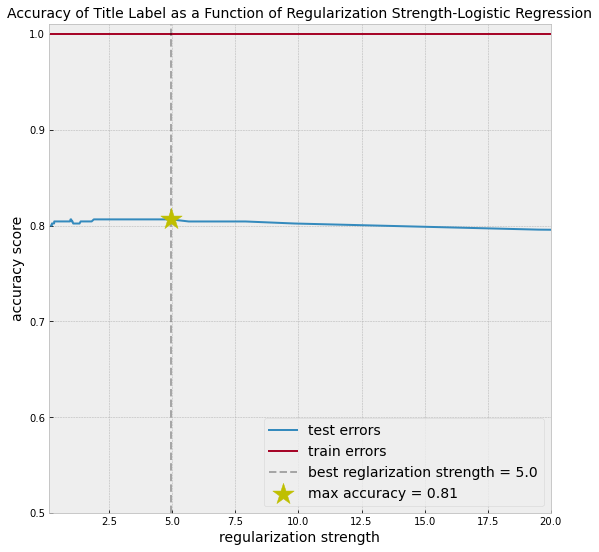

In [149]:
fig, ax=plt.subplots(figsize=(9,9))
plt.style.use('bmh')
ax.plot(strength, avg_errors_test, label = 'test errors')
ax.plot(strength, avg_errors_train, label = 'train errors')
ax.set_xlabel('regularization strength', fontsize=14)
ax.set_ylabel('accuracy score', fontsize=14)
ax.set_title('Accuracy of Title Label as a Function of Regularization Strength-Logistic Regression', fontsize=14)
ax.set_xlim(0.1, 20)
ax.set_ylim(0.5, 1.01)
ax.scatter(1/optimal_alpha, max_acc, label = f'max accuracy = {max_acc:.2f}', s= 500, color = 'y', marker = '*', zorder=4)
plt.axvline(1/optimal_alpha, label = f'best reglarization strength = {(1/optimal_alpha).round(1)}', color = 'k', linestyle = 'dashed', alpha=0.3)

plt.legend(loc = 4, fontsize=14);
plt.savefig('acnh_v_doom/NLP/log_regres/Body_title_rec_reg', bbox_inches='tight')